[CIFAR-10 Dataset](https://www.cs.toronto.edu/~kriz/cifar.html) was built and shared by Alex Krizhevsky, Vinod Nair, and Geoffrey Hinton.

### Load tensorflow

In [2]:
import numpy as np

In [3]:
import tensorflow as tf

### Collect Data

In [4]:
(trainX, trainY),(testX, testY) = tf.keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 35s 0us/step


In [6]:
trainX.shape

(50000, 32, 32, 3)

### Convert Output label to multiple values

In [7]:
trainY = tf.keras.utils.to_categorical(trainY, num_classes=10)
testY = tf.keras.utils.to_categorical(testY, num_classes=10)

In [8]:
trainX=trainX/255
testX=testX/255    # standardize the data for train and test to be between 0-1

## Build the Graph

In [9]:
tf.keras.backend.clear_session()
#Initialize model, reshape & normalize data
model = tf.keras.models.Sequential()

#Reshape data from 2D (28,28) to 3D (28, 28, 1)
model.add(tf.keras.layers.Reshape((32,32,3),input_shape=(32,32,3)))

### Apply Convolutional Layers, MaxPooling

In [ ]:
#Add first convolutional layer
model.add(tf.keras.layers.Conv2D(32, #Number of filters 
                                 kernel_size=(3,3), #Size of the filter
                                 activation='relu'))

#Add second convolutional layer
model.add(tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
model.add(tf.keras.layers.Conv2D(128, kernel_size=(3,3), activation='relu'))
model.add(tf.keras.layers.Conv2D(256, kernel_size=(3,3), activation='relu'))
#Add MaxPooling layer
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))

#model.add(tf.keras.layers.GlobalAveragePooling2D())

### Add layers for Classification

In [ ]:
#Flatten the output
model.add(tf.keras.layers.Flatten())

#Dense layer
model.add(tf.keras.layers.Dense(128, activation='relu'))

#Add another dropout layer
model.add(tf.keras.layers.Dropout(0.3))

#Output layer
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [ ]:
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 128)       73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 256)       295168    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 256)         0

## Train the model

In [ ]:
#Train the model
model.fit(trainX,trainY,          
          validation_data=(testX,testY),
          epochs=10,
          batch_size=32)

Epoch 1/10
1563/1563 [==============================] - 43s 6ms/step - loss: 1.7518 - accuracy: 0.3504 - val_loss: 1.1509 - val_accuracy: 0.5955
Epoch 2/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.0860 - accuracy: 0.6153 - val_loss: 0.8891 - val_accuracy: 0.6937
Epoch 3/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.8558 - accuracy: 0.6991 - val_loss: 0.8263 - val_accuracy: 0.7135
Epoch 4/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.7286 - accuracy: 0.7463 - val_loss: 0.8158 - val_accuracy: 0.7287
Epoch 5/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.6315 - accuracy: 0.7776 - val_loss: 0.7424 - val_accuracy: 0.7476
Epoch 6/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.5444 - accuracy: 0.8095 - val_loss: 0.7932 - val_accuracy: 0.7447
Epoch 7/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.4730 - accuracy: 0.8325 - val_loss: 0.7969 - val_accuracy

In [ ]:
model.save('demo.h5')

In [ ]:
!ls -l

total 14236
-rw-r--r-- 1 root root 14570968 Mar  6 13:19 demo.h5
drwxr-xr-x 1 root root     4096 Mar  1 14:35 sample_data


In [ ]:
tf.keras.backend.clear_session()
#Initialize model, reshape & normalize data
model = tf.keras.models.Sequential()
model = tf.keras.applications.vgg19.VGG19(include_top=False, #Do not include FC layer at the end
                                          input_shape=(32,32, 3),
                                          weights='imagenet')

In [ ]:
#Set pre-trained model layers to not trainable
for layer in model.layers:
    layer.trainable = False

In [ ]:
print(len(model.layers))
for layer in model.layers[10:]:
    layer.trainable =  True   

22


### Add FC layer for new classes

In [ ]:
#get Output layer of Pretrained model
x = model.output

#Flatten the output to feed to Dense layer
x = tf.keras.layers.Flatten()(x)

#Add one Dense layer
x = tf.keras.layers.Dense(200, activation='relu')(x)

#Add output layer
prediction = tf.keras.layers.Dense(10,activation='softmax')(x)

In [ ]:
model.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 8, 128)         0     

### Building final model for Classification

In [ ]:
#Using Keras Model class
final_model = tf.keras.models.Model(inputs=model.input, #Pre-trained model input as input layer
                                    outputs=prediction) #Output layer added

In [ ]:
final_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

### Train the model

In [ ]:
final_model.fit(trainX,trainY,          
          validation_data=(testX,testY),
          epochs=10,
          batch_size=64)


Epoch 1/10
782/782 [==============================] - 30s 38ms/step - loss: 0.2999 - accuracy: 0.9036 - val_loss: 1.0781 - val_accuracy: 0.7360
Epoch 2/10
782/782 [==============================] - 30s 38ms/step - loss: 0.2489 - accuracy: 0.9207 - val_loss: 1.0345 - val_accuracy: 0.7542
Epoch 3/10
782/782 [==============================] - 30s 38ms/step - loss: 0.2103 - accuracy: 0.9326 - val_loss: 1.0833 - val_accuracy: 0.7474
Epoch 4/10
782/782 [==============================] - 30s 38ms/step - loss: 0.2331 - accuracy: 0.9270 - val_loss: 0.9675 - val_accuracy: 0.7245
Epoch 5/10
782/782 [==============================] - 30s 38ms/step - loss: 0.2137 - accuracy: 0.9327 - val_loss: 1.1522 - val_accuracy: 0.7511
Epoch 6/10
782/782 [==============================] - 30s 38ms/step - loss: 0.1707 - accuracy: 0.9460 - val_loss: 1.2275 - val_accuracy: 0.7448
Epoch 7/10
782/782 [==============================] - 30s 39ms/step - loss: 0.1661 - accuracy: 0.9479 - val_loss: 1.1298 - val_accuracy:

In [ ]:
import numpy as np
from keras.datasets import cifar10

#Load the dataset:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [ ]:
print("There are {} train images and {} test images.".format(X_train.shape[0], X_test.shape[0]))
print('There are {} unique classes to predict.'.format(np.unique(y_train).shape[0]))

There are 50000 train images and 10000 test images.
There are 10 unique classes to predict.


In [ ]:
#One-hot encoding the labels
num_classes = 10
from keras.utils import np_utils
y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)

Shape of each image in the training data:  (32, 32, 3)


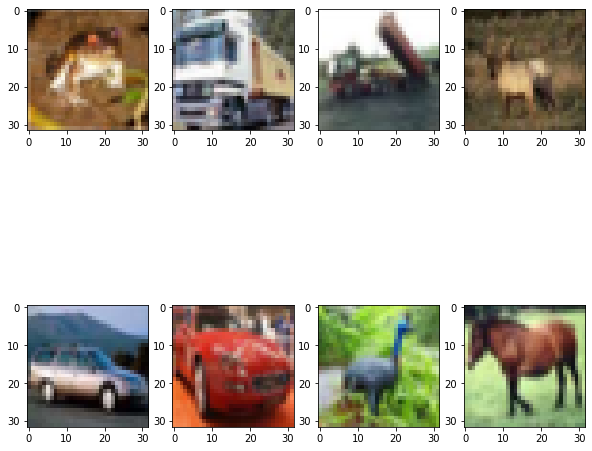

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 10))

for i in range(1, 9):
    img = X_train[i-1]
    fig.add_subplot(2, 4, i)
    plt.imshow(img)

print('Shape of each image in the training data: ', X_train.shape[1:])

In [ ]:
#Importing the necessary libraries 
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D
from keras.layers import Dropout, Flatten, GlobalAveragePooling2D

#Building up a Sequential model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu',input_shape = X_train.shape[1:]))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(GlobalAveragePooling2D())
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 13, 13, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 6, 32)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 4, 4, 64)          18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 2, 2, 64)          0         
_________________________________________________________________
global_average_pooling2d (Gl (None, 64)               

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam',
              metrics=['accuracy'])

In [ ]:
X_train_scratch = X_train/255
X_test_scratch = X_test/255

In [ ]:
from keras.callbacks import ModelCheckpoint

checkpointer = ModelCheckpoint(filepath='scratchmodel.best.hdf5', 
                               verbose=1,save_best_only=True)

In [ ]:
#Fitting the model on the train data and labels.
model.fit(X_train, y_train, batch_size=32, epochs=10, 
          verbose=1, callbacks=[checkpointer], validation_split=0.2, shuffle=True)

Epoch 1/10
1250/1250 [==============================] - 5s 4ms/step - loss: 0.2317 - accuracy: 0.4816 - val_loss: 0.2256 - val_accuracy: 0.5050

Epoch 00001: val_loss improved from 0.24884 to 0.22559, saving model to scratchmodel.best.hdf5
Epoch 2/10
1250/1250 [==============================] - 5s 4ms/step - loss: 0.2109 - accuracy: 0.5423 - val_loss: 0.2039 - val_accuracy: 0.5617

Epoch 00002: val_loss improved from 0.22559 to 0.20386, saving model to scratchmodel.best.hdf5
Epoch 3/10
1250/1250 [==============================] - 5s 4ms/step - loss: 0.1949 - accuracy: 0.5907 - val_loss: 0.1954 - val_accuracy: 0.5844

Epoch 00003: val_loss improved from 0.20386 to 0.19542, saving model to scratchmodel.best.hdf5
Epoch 4/10
1250/1250 [==============================] - 5s 4ms/step - loss: 0.1832 - accuracy: 0.6182 - val_loss: 0.1870 - val_accuracy: 0.6052

Epoch 00004: val_loss improved from 0.19542 to 0.18701, saving model to scratchmodel.best.hdf5
Epoch 5/10
1250/1250 [==================

In [ ]:
#Evaluate the model on the test data
score = model.evaluate(X_test, y_test)

#Accuracy on test data
print('Accuracy on the Test Images: ', score[1])

10000/10000 [==============================] - 4s 369us/step
Accuracy on the Test Images:  0.9106299810409546


## Vanilla CNN + Data Augmentation

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

# This will do preprocessing and realtime data augmentation:
datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=50,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=False,  # randomly flip images
    vertical_flip=False)  # randomly flip images

# Prepare the generator
datagen.fit(trainX)

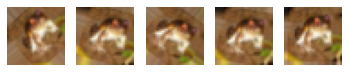

In [ ]:
from matplotlib import pyplot as plt
gen = datagen.flow(trainX[:1], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze(), cmap='gray')
    plt.plot()

## Build the Graph

In [ ]:
tf.keras.backend.clear_session()
#Initialize model, reshape & normalize data
model = tf.keras.models.Sequential()

#Reshape data from 2D (28,28) to 3D (28, 28, 1)
model.add(tf.keras.layers.Reshape((32,32,3),input_shape=(32,32,3)))

### Apply Convolutional Layers, MaxPooling

In [ ]:
#Add first convolutional layer
model.add(tf.keras.layers.Conv2D(32, #Number of filters 
                                 kernel_size=(3,3), #Size of the filter
                                 activation='relu'))

#Add second convolutional layer
model.add(tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
model.add(tf.keras.layers.Conv2D(128, kernel_size=(3,3), activation='relu'))
model.add(tf.keras.layers.Conv2D(256, kernel_size=(3,3), activation='relu'))
#Add MaxPooling layer
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))

#model.add(tf.keras.layers.GlobalAveragePooling2D())

### Add layers for Classification

In [ ]:
#Flatten the output
model.add(tf.keras.layers.Flatten())

#Dense layer
model.add(tf.keras.layers.Dense(128, activation='relu'))

#Add another dropout layer
model.add(tf.keras.layers.Dropout(0.3))

#Output layer
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [ ]:
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 128)       73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 256)       295168    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 256)         0

In [ ]:
TRAIN = True
BATCH_SIZE = 32
EPOCHS = 10

In [ ]:
TRAIN= True
if TRAIN:
    model.fit_generator(datagen.flow(trainX, trainY,
                        batch_size=BATCH_SIZE),
                        steps_per_epoch=trainX.shape[0]/BATCH_SIZE,
                        epochs=EPOCHS,
                        validation_data=(testX, testY))
    model.save('./cnn_augment.h5')
else:
    print('Loading pretrained model...')
    model3 = keras.models.load_model('./cnn_augment.h5')
    print('Model Loaded.')

Epoch 1/10
   7/1562 [..............................] - ETA: 26s - loss: 1.6255 - accuracy: 0.4062

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


1562/1562 [==============================] - 28s 18ms/step - loss: 1.4610 - accuracy: 0.4698 - val_loss: 1.1860 - val_accuracy: 0.5720
Epoch 2/10
1562/1562 [==============================] - 28s 18ms/step - loss: 1.3227 - accuracy: 0.5258 - val_loss: 1.0992 - val_accuracy: 0.6079
Epoch 3/10
1562/1562 [==============================] - 28s 18ms/step - loss: 1.2181 - accuracy: 0.5679 - val_loss: 1.0737 - val_accuracy: 0.6335
Epoch 4/10
1562/1562 [==============================] - 28s 18ms/step - loss: 1.1438 - accuracy: 0.5972 - val_loss: 0.9488 - val_accuracy: 0.6677
Epoch 5/10
1562/1562 [==============================] - 28s 18ms/step - loss: 1.0939 - accuracy: 0.6152 - val_loss: 0.9913 - val_accuracy: 0.6644
Epoch 6/10
1562/1562 [==============================] - 28s 18ms/step - loss: 1.0607 - accuracy: 0.6321 - val_loss: 0.9420 - val_accuracy: 0.6752
Epoch 7/10
1562/1562 [==============================] - 28s 18ms/step - loss: 1.0211 - accuracy: 0.6412 - val_loss: 0.8784 - val_accura

In [ ]:
loss_and_metrics = model3.evaluate(x_test, y_test)
print(loss_and_metrics)

10000/10000 [==============================] - 1s 106us/step
[0.03394505218988634, 0.9891]
